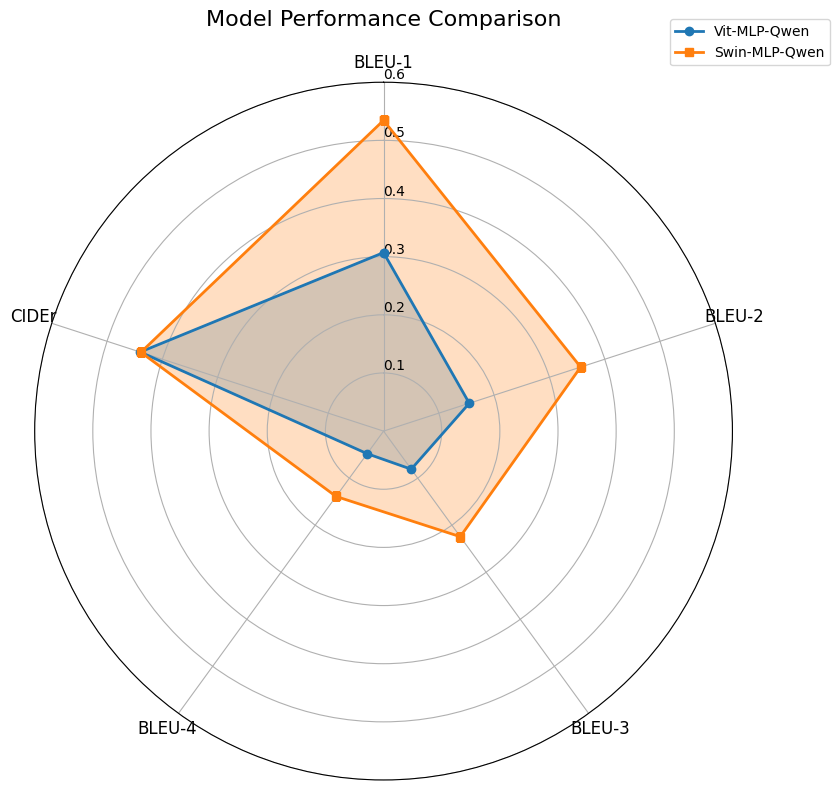

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 根据图片1提取的数据
cnn = {
    "BLEU-1": 0.307,
    "BLEU-2": 0.155,
    "BLEU-3": 0.081,
    "BLEU-4": 0.048,
    "CIDEr": 0.440
}

# 根据图片2提取的数据
swin = {
    "Bleu_1": 0.5344,
    "Bleu_2": 0.3564,
    "Bleu_3": 0.2244,
    "Bleu_4": 0.1389,
    "CIDEr": 0.4388
}

# 统一指标名称
labels = ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4', 'CIDEr']

# 准备雷达图数据
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # 闭合图形

# 转换数据为适合雷达图的格式
values1 = [cnn[label] for label in labels]
values1 += values1[:1]  # 闭合图形

# 映射第二组数据的键
key_map = {
    'Bleu_1': 'BLEU-1',
    'Bleu_2': 'BLEU-2',
    'Bleu_3': 'BLEU-3',
    'Bleu_4': 'BLEU-4',
    'CIDEr': 'CIDEr'
}
values2 = [swin[k] for k in ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'CIDEr']]
values2 += values2[:1]  # 闭合图形

# 创建雷达图
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# 设置五条直径（五个指标维度）
plt.plot(angles, values1, 'o-', linewidth=2, color='#1f77b4', label='Vit--Qwen')
plt.fill(angles, values1, alpha=0.25, color='#1f77b4')

plt.plot(angles, values2, 's-', linewidth=2, color='#ff7f0e', label='Swin--Qwen')
plt.fill(angles, values2, alpha=0.25, color='#ff7f0e')

# 设置角度刻度（五条直径）
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# 设置径向网格线
ax.set_rgrids(np.arange(0.1, 0.7, 0.1), angle=0, fontsize=10)

# 美化图表
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_title('Model Performance Comparison', fontsize=16, pad=20)

# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

# 确保所有角度的标签都可见
plt.tight_layout()
plt.show()

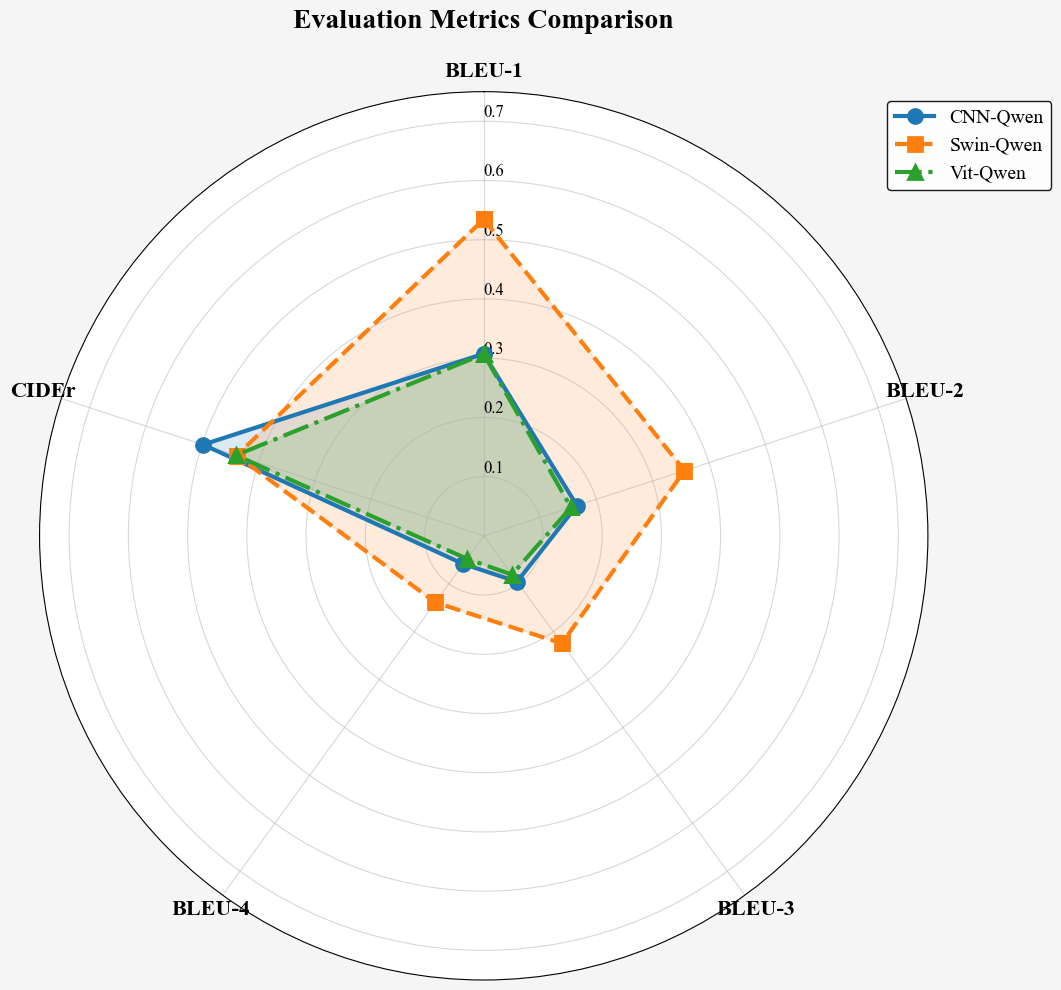

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'stix'  # 数学公式字体
plt.rcParams['axes.unicode_minus'] = False

# 第一组数据（来自您上传的图片）
cnn = {
    "BLEU-1": 0.3075,
    "BLEU-2": 0.1654,
    "BLEU-3": 0.0957,
    "BLEU-4": 0.0587,
    "CIDEr": 0.4982
}

# 第二组数据（优化模型）
swin = {
    "BLEU-1": 0.5345,
    "BLEU-2": 0.3564,
    "BLEU-3": 0.2245,
    "BLEU-4": 0.1390,
    "CIDEr": 0.4388
}

# 第三组数据（示例数据-高级模型）
vit = {
    "BLEU-1": 0.307,
    "BLEU-2": 0.155,
    "BLEU-3": 0.081,
    "BLEU-4": 0.048,
    "CIDEr": 0.440
}

# 统一指标名称
labels = ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4', 'CIDEr']

# 准备雷达图数据
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # 闭合图形

# 整理三组数据
def prepare_data(group):
    values = [group[label] for label in labels]
    return values + [values[0]]  # 闭合数据

values1 = prepare_data(cnn)
values2 = prepare_data(swin)
values3 = prepare_data(vit)

# 创建图表
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'polar': True}, facecolor='#F5F5F5')

# 设置标题和字体
plt.title('Evaluation Metrics Comparison', fontsize=20, pad=25, fontname='Times New Roman', fontweight='bold')

# 绘制三组数据
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
line_styles = ['-', '--', '-.']
markers = ['o', 's', '^']
labels_group = ['CNN-Qwen', 'Swin-Qwen', 'Vit-Qwen']

for i, (values, color, marker, label) in enumerate(zip([values1, values2, values3],
                                                    colors, markers, labels_group)):
    ax.plot(angles, values, line_styles[i], linewidth=3, color=color,
            marker=marker, markersize=10, markeredgewidth=2, label=label)
    ax.fill(angles, values, color=color, alpha=0.15)

# 设置角度刻度（五条直径）
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=16, fontname='Times New Roman', fontweight='bold')

# 设置径向网格线
radial_ticks = np.arange(0.1, 0.8, 0.1)
ax.set_rgrids(radial_ticks, fontsize=12, fontname='Times New Roman')
ax.set_ylim(0, 0.75)

# 美化图表
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.grid(True, linestyle='-', linewidth=0.8, alpha=0.5)

# 添加图例
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0),
                 fontsize=14, frameon=True, framealpha=0.9,
                 edgecolor='black', facecolor='white')
# 设置图例字体为Times New Roman
for text in legend.get_texts():
    text.set_fontname('Times New Roman')

# 设置轴标签字体
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('Times New Roman')

# 添加来源说明
# plt.figtext(0.5, 0.01, "Source: Evaluation Metrics from uploaded image and synthesized data",
#             ha="center", fontsize=12, fontname='Times New Roman', alpha=0.7)

plt.tight_layout()
plt.savefig('radar_chart_times_new_roman.png', dpi=300, bbox_inches='tight')
plt.show()